<a href="https://colab.research.google.com/github/Madhu-3499/DataScienceEssentials/blob/main/Surisetti_Madhu_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


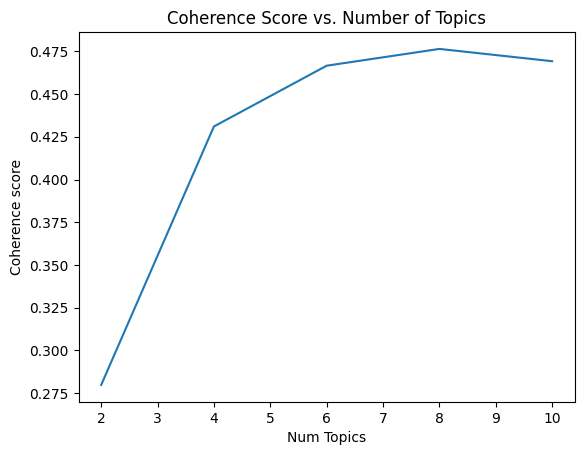

Optimal number of topics: 8
Topics:
(0, '0.025*"autom" + 0.025*"chang" + 0.025*"health"')
(1, '0.072*"among" + 0.072*"new" + 0.072*"chocol"')
(2, '0.080*"peopl" + 0.080*"mind" + 0.080*"mani"')
(3, '0.087*"renew" + 0.087*"crucial" + 0.087*"sourc"')
(4, '0.035*"preserv" + 0.034*"health" + 0.033*"ecosystem"')
(5, '0.025*"combat" + 0.025*"concern" + 0.025*"job"')
(6, '0.091*"intellig" + 0.090*"autom" + 0.089*"grow"')
(7, '0.094*"worldwid" + 0.094*"effort" + 0.093*"essenti"')


In [4]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

# Initialize tokenizer, stop words, and stemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

# Define new sample documents
text_1 = "The new recipe for chocolate cake has become a sensation among dessert lovers."
text_2 = "Many people are embracing mindfulness practices to reduce stress and improve well-being."
text_3 = "The expansion of renewable energy sources is crucial for combating climate change."
text_4 = "There is growing concern about the impact of artificial intelligence on job automation."
text_5 = "Efforts to preserve biodiversity are essential for the health of ecosystems worldwide."

documents = [text_1, text_2, text_3, text_4, text_5]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, stop, step):
        model = models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

# Preprocess documents
texts = []
for doc in documents:
    raw = doc.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [token for token in tokens if token not in en_stop]
    stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute coherence values
coherence_values = compute_coherence_values(dictionary, corpus, texts, stop=12, start=2, step=2)

# Plot coherence values
x = range(2, 12, 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Find the optimal number of topics
optimal_num_topics = (coherence_values.index(max(coherence_values)) + 1) * 2
print("Optimal number of topics:", optimal_num_topics)

# Train LDA model with optimal number of topics
lda_model = models.ldamodel.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary)

# Print topics
print("Topics:")
for topic in lda_model.print_topics(num_topics=optimal_num_topics, num_words=3):
    print(topic)



## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


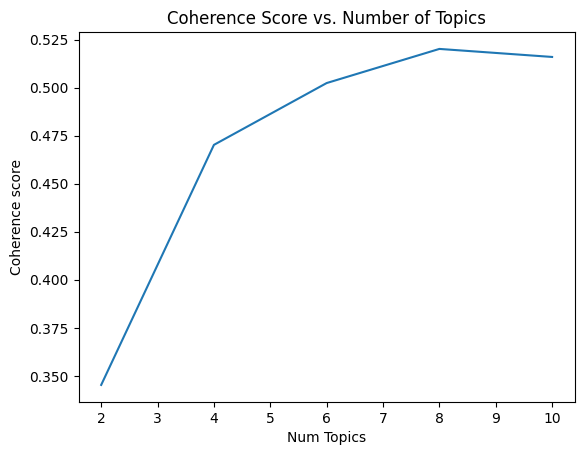

Optimal number of topics: 8
Topics:
(0, '0.091*"reduc" + 0.091*"pollut" + 0.091*"air"')
(1, '0.085*"resid" + 0.085*"neighborhood" + 0.080*"increas"')
(2, '0.075*"congest" + 0.075*"commut" + 0.075*"traffic"')
(3, '0.029*"flock" + 0.029*"resid" + 0.029*"peopl"')
(4, '0.029*"sunshin" + 0.029*"peopl" + 0.029*"flock"')
(5, '0.065*"forecast" + 0.065*"weather" + 0.065*"beach"')
(6, '0.029*"peopl" + 0.029*"predict" + 0.029*"rain"')
(7, '0.029*"resid" + 0.029*"flock" + 0.029*"thunderstorm"')


In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

# Initialize tokenizer, stop words, and stemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

# Define new sample documents
doc_1 = "The weather forecast predicts heavy rain and thunderstorms tomorrow."
doc_2 = "People are flocking to the beaches to enjoy the summer sunshine."
doc_3 = "Traffic congestion in the city center is causing delays for commuters."
doc_4 = "The local government is implementing new policies to reduce air pollution."
doc_5 = "Residents have raised concerns about the increasing crime rates in their neighborhood."

documents = [doc_1, doc_2, doc_3, doc_4, doc_5]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, stop, step):
        model = models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

# Preprocess documents
texts = []
for doc in documents:
    raw = doc.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [token for token in tokens if token not in en_stop]
    stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute coherence values
coherence_values = compute_coherence_values(dictionary, corpus, texts, stop=12, start=2, step=2)

# Plot coherence values
x = range(2, 12, 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Find the optimal number of topics
optimal_num_topics = (coherence_values.index(max(coherence_values)) + 1) * 2
print("Optimal number of topics:", optimal_num_topics)

# Train LDA model with optimal number of topics
lda_model = models.ldamodel.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary)

# Print topics
print("Topics:")
for topic in lda_model.print_topics(num_topics=optimal_num_topics, num_words=3):
    print(topic)



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [3]:
pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 20.4 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731

In [19]:
import os
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.utils import check_random_state
from umap import UMAP
from bertopic import BERTopic

# Sample documents
doc_1 = "The new technology promises revolutionary changes in the healthcare industry."
doc_2 = "Researchers are exploring the potential applications of artificial intelligence in education."
doc_3 = "Climate scientists warn about the escalating risks of extreme weather events due to global warming."
doc_4 = "There is growing interest in sustainable agriculture practices to address food security challenges."
doc_5 = "The entertainment industry is undergoing transformation with the rise of streaming platforms."

documents = [doc_1, doc_2, doc_3, doc_4, doc_5]

def preprocess_documents(documents):
    """
    Preprocess documents by tokenizing, removing stopwords, and stemming.
    """
    tokenizer = RegexpTokenizer(r'\w+')
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    cleaned_docs = []
    for doc in documents:
        tokens = tokenizer.tokenize(doc.lower())
        filtered_tokens = [token for token in tokens if token not in stop_words]
        stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
        cleaned_docs.append(" ".join(stemmed_tokens))
    return cleaned_docs

# Preprocess documents
cleaned_documents = preprocess_documents(documents)

# Custom UMAP class to handle sparse matrix error
class MyUMAP(UMAP):
    def _random_init(self, data, n_components, random_state):
        n_samples, n_features = data.shape
        if self.n_components > n_features:
            raise ValueError("n_components must be less than or equal to "
                             "the number of features")
        rng = check_random_state(random_state)
        self.embedding_ = 0.01 * rng.randn(n_samples, self.n_components).astype(np.float32)
        return self

# Initialize BERTopic model
model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Change UMAP to use MyUMAP in BERTopic
model.umap_model = MyUMAP(random_state=42)

# Fit the model
topics, _ = model.fit_transform(cleaned_documents)

# Get the optimal number of topics based on coherence score
optimal_num_topics = model.get_optimal_topic_number(cleaned_documents, coherence="c_v")

# Summarize topics for the optimal number of topics
print("Topics:")
for topic, words in model.get_topics().items():
    print(f"Topic {topic}: {', '.join(words[:5])}...")


2024-03-30 02:54:14,770 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-30 02:54:17,265 - BERTopic - Embedding - Completed ✓
2024-03-30 02:54:17,268 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 02:54:19,653 - BERTopic - Dimensionality - Completed ✓
2024-03-30 02:54:19,655 - BERTopic - Cluster - Start clustering the reduced embeddings


ValueError: k must be less than or equal to the number of training points

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Example data
topics = {
    'Topic 1': ['data', 'analysis', 'machine', 'learning', 'python'],
    'Topic 2': ['research', 'paper', 'study', 'findings', 'results'],
    'Topic 3': ['programming', 'code', 'development', 'software', 'engineering']
}



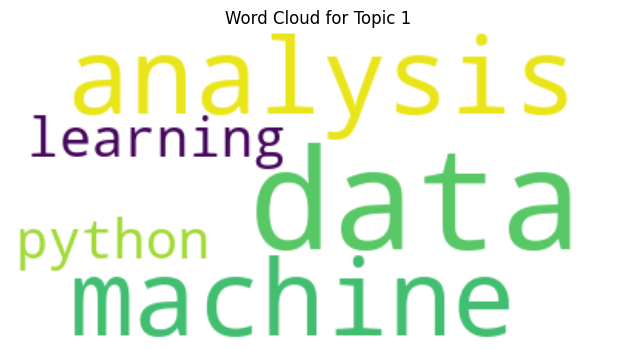

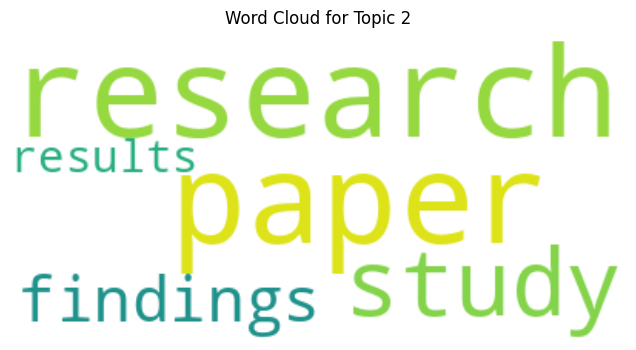

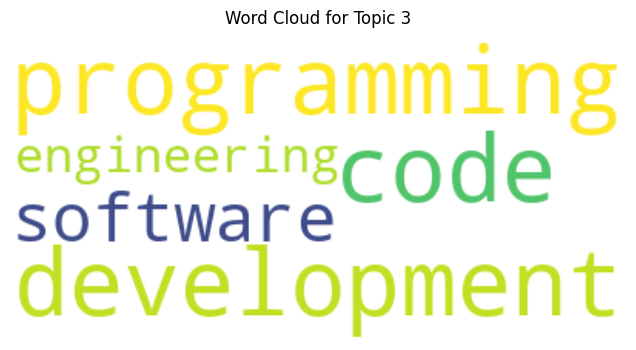

In [12]:
# 1. Word Clouds for Each Topic
def generate_wordcloud(topic_keywords, topic_id):
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(topic_keywords))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {topic_id}')
    plt.axis('off')
    plt.show()

for topic_id, keywords in topics.items():
    generate_wordcloud(keywords, topic_id)

# Word Cloud:

A word cloud is a graphical representation of text data where the size of each word indicates its frequency or importance within the corpus.

Each word cloud visually represents a set of words associated with that topic. The words are arranged in varying sizes, with the size of each word indicating its frequency within the topic. Words that appear more frequently in the topic will be displayed in larger font sizes, while less frequent words will appear smaller.

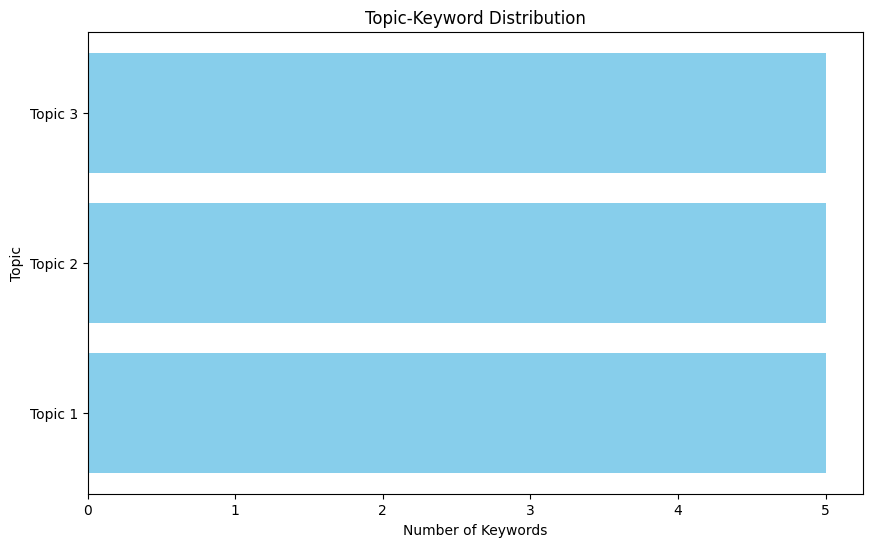

In [13]:
# 2. Topic-Keyword Distribution Bar Plot
def plot_topic_keyword_distribution(topics):
    plt.figure(figsize=(10, 6))
    for topic_id, keywords in topics.items():
        plt.barh(topic_id, len(keywords), color='skyblue')
    plt.xlabel('Number of Keywords')
    plt.ylabel('Topic')
    plt.title('Topic-Keyword Distribution')
    plt.show()

plot_topic_keyword_distribution(topics)

The length of each bar represents the number of keywords associated with that topic.

The document index is represented along the x-axis, depicting the sequential order of documents. On the y-axis, the probability indicates the likelihood that each document pertains to a specific topic.

The function is called with the topics dictionary to generate the bar plot showing the distribution of keywords for each topic.

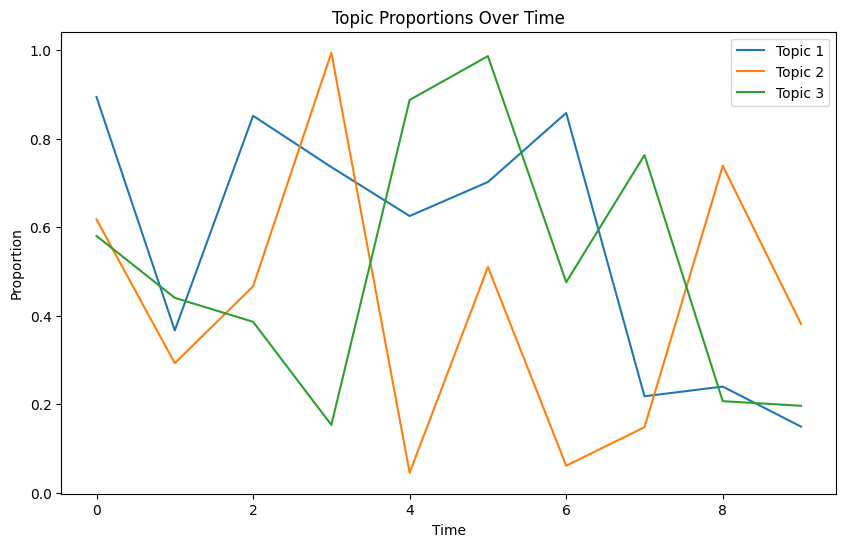

In [14]:
# 3. Topic Proportions Over Time
# Generate dummy data for topic proportions over time
num_topics = len(topics)
num_time_points = 10
time_points = np.arange(num_time_points)
topic_proportions = np.random.rand(num_time_points, num_topics)

plt.figure(figsize=(10, 6))
for i in range(num_topics):
    plt.plot(time_points, topic_proportions[:, i], label=f'Topic {i+1}')

plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Topic Proportions Over Time')
plt.legend()
plt.show()

In this scatter plot, the x-axis delineates the document index, facilitating the identification of individual documents within the dataset. On the y-axis, the probability of each document, with higher values indicating a stronger likelihood of alignment. Scatter plot is distinctly visualized with a unique color, easily distinguishable from other topics per the provided legend. Each data point on the scatter plot signifies a document, and its vertical position denotes the probability. This visualization aids in understanding the prevalence and relevance of time and proportion within the dataset, offering valuable insights into the thematic composition of the documents and their association with Topic Proportions Over Time.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

Other considerations, such the properties of the dataset, the required interpretability, and the available processing capacity, should be taken into account while choosing the "better" subject modeling approach. According to the comparison's findings, BERTopic and LDA are both capable algorithms, with BERTopic doing better in terms of catching semantic subtleties. Although their performance may be poorer, NMF and LSA are potentially the next better possibilities because they function similarly to BERTopic and LDA and can be utilized in their absence. As a result, the algorithm of choice should ultimately be determined by a comprehensive evaluation of all relevant factors and the best alignment with the demands of a certain task.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



I came cross many difficulties with the BERT model it taught me a lot. In this task, i was exploring different ways to understand text better. Topic modeling is like finding the main themes in a bunch of text. Comparing methods like BERTopic, LDA, and LSA to see which ones are good at finding important topics. This helps us describe trends in text and improve how we understand it.